### AirBnB Challenge Findings

Before conducting any analysis, we hypothesized that the following factors will have the most impact on pricing:
* Property/Room Type
* Size of room - indicators of size include number of bathrooms, number of bedrooms, number of beds, and how many people the room can accomodate. The larger the size, the more expensive the place would be.
* Location - the specific city/neighborhood the place would be in. 
* How "nice" the place is. Features that are helpful for suggesting how nice a place is include: description of the place, name of the listing, the picture, the review scores rating, and amenities

In addition, we also created additional features that we believed would be helpful too:
* Distance from the city center. For each city, we picked a location in that city to represent the "center", and calculated distance between the center and the city. For example, for New York, we chose Times Square to represent the center, and calculated distance between each NYC room and Times Square's latitude/longitude coordinates. For San Francisco, we chose Fisherman's Wharf, etc. The hypothesis was that the closer the room is to the center, the more expensive the price
* Presence of city features, such as restaurants, bus stations, attractions, hotels, etc. Using Google Places API, we added in data on the count of such features within a 5-km radius of the rental room
* Income level: pulled in data for income level by zip code. We hypothesize that the higher the income level, the higher the room price.
* Mean green, blue, red pixels within pictures - the RGB ratio may correspond to attractiveness of pictures, which can increase the price


__After conducting our exploratory data analysis, we observed the following (for more details, see below graphs):__
1. Features regarding property type, bedroom type, and bed type impact price
2. Features having to do with the size of the room (i.e. # of people it accommodates, # of bedrooms) are positively correlated with price
3. Income level surrounding the area where the room is located has a positive correlation with price
4. How close the room is to the center of the city impacts price - the further away from the city center, the lower the price
5. The presence and number of nearby attractions, restaurants, hotels, etc., impacts price. For example, having spas, being close to embassies, having nearby transit stations, and having a large number of restaurants close by corresponds to a higher than average log_price (log_price close to 6 or 7, higher than average of 5). Being close to cardealers, churches, supermarkets, hospital, courthouses, city halls, and train stations correspond with a lower than average log_price (log_price closer to 4 or below; perhaps these factors correspond to residential areas, which may be cheaper). Interestingly, having a lot of bars close by also correlates with a lower than average log_price.
6. City - Average prices do differ by city (and also within neighborhoods). What is also an important observation is that the effect of other features on price also differ by city. For example: the impact of how far away a room is from the city center differs by city. For example, comparing this for Boston vs. LA: the negative correlation between city center and price is greatest for Boston, at -0.4, while for Los Angeles, the correlation is weakest, at -0.056. So, for Boston, being 15 miles away from the city center (downtown Boston) decreases pricing by about 100 dollars, while in LA, being 80 miles away from city center (Hollywood) decreases pricing by only about 30 to 40 dollars (a potential explanation for this could be that LA is somewhat close to other major California cities, like Malibu, so while a location may be far away from central LA, it may be close to another major city, reducing how much the price decreases). "Between-City" differences on the impact on price can be observed for most other features too.
7. Amenities did not seem to have as large of an impact as expected. Some amenities that correlate with a higher log_price of 6 or above are surprisingly simple: they are having towels, toilet paper, and soap. An amenity that seemed to correlate with a lower log_price of 4 was being handicap-accessible. None of the other amenities seemed to have a differentiating impact on price
8. Listing descriptions: NLP was performed to extract words that may be indicative of higher prices. The existence of some words indicated higher prices (log_price = 6 or above); examples are: "luxury", "vacation", any words having to do with ocean, "architecture", "facing" (perhaps this word corresponds with descriptions of rooms facing nice views). Examples of words that indicated lower prices include: "diverse" (perhaps this corresponds with areas with a lot of immigrants and therefore cheaper), "friendly" (perhpas this word often appears to describe room mates/neighbors the room has to be shared with), "bunk", "uptown", "suitable" (perhaps this word often indicates level of basicness, but nothing fancy).
9. Surprisingly, features such as review ratings, host response rate, length of time a person has been a host do not seem to have a large impact on price, though the graphs suggest a small statistically significant impact. The log_price is close to 5 regardless of what the values for these features are.
10. Cancellation Policy - stricter cancellation policies correspond to high log_prices of 6 or 7
11. Decomposition of room pictures - meanR, meanG, meanB have small statistically significant impacts on price.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

import seaborn as sns

In [2]:
train = pd.read_csv('train.csv') # original train data

In [8]:
data = pd.read_csv('data_0309_v1.csv', encoding = "ISO-8859-1") # pre-processed data with additional features added

In [19]:
train['price'] = np.exp(train['log_price'])

In [22]:
train['price'].describe()

count    74111.000000
mean       160.370849
std        168.580415
min          1.000000
25%         75.000000
50%        111.000000
75%        185.000000
max       1999.000000
Name: price, dtype: float64

### Examining Property Type / Room Type Features

As expected, the data shows that property type and room type impacts price. 

[Text(0,0,'Apartment'),
 Text(0,0,'House'),
 Text(0,0,'Condominium'),
 Text(0,0,'Townhouse'),
 Text(0,0,'Loft'),
 Text(0,0,'Other'),
 Text(0,0,'Guesthouse'),
 Text(0,0,'Bed & Breakfast'),
 Text(0,0,'Bungalow'),
 Text(0,0,'Villa'),
 Text(0,0,'Dorm'),
 Text(0,0,'Guest suite'),
 Text(0,0,'Camper/RV'),
 Text(0,0,'Timeshare'),
 Text(0,0,'Cabin'),
 Text(0,0,'In-law'),
 Text(0,0,'Hostel'),
 Text(0,0,'Boutique hotel'),
 Text(0,0,'Boat'),
 Text(0,0,'Serviced apartment'),
 Text(0,0,'Tent'),
 Text(0,0,'Castle'),
 Text(0,0,'Vacation home'),
 Text(0,0,'Yurt'),
 Text(0,0,'Hut'),
 Text(0,0,'Treehouse'),
 Text(0,0,'Chalet'),
 Text(0,0,'Earth House'),
 Text(0,0,'Tipi'),
 Text(0,0,'Train'),
 Text(0,0,'Cave'),
 Text(0,0,'Lighthouse'),
 Text(0,0,'Parking Space'),
 Text(0,0,'Island'),
 Text(0,0,'Casa particular')]

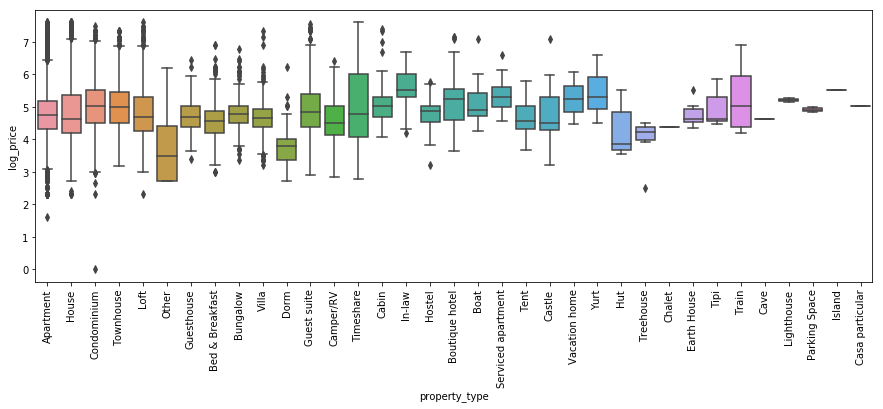

In [3]:
property = train['property_type'].value_counts().index.unique()
fig, ax = plt.subplots(figsize=(15, 5))
#g = sns.violinplot(x="property_type", y="price", orient='v', data=train)
g = sns.boxplot(x="property_type", y="log_price", orient='v', data=train)
g.set_xticklabels(property, rotation=90)

[Text(0,0,'Entire home/apt'),
 Text(0,0,'Private room'),
 Text(0,0,'Shared room')]

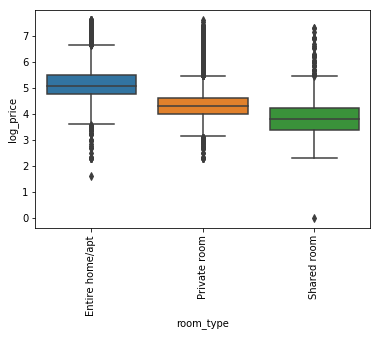

In [4]:
roomtype = train['room_type'].value_counts().index.unique()
g = sns.boxplot(x="room_type", y="log_price", orient='v', data=train)
g.set_xticklabels(roomtype, rotation=90)

### Examining Size Indicators

The larger the space, the higher the price, up to a certain point. Looking at "accommodates" as an example:

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16')]

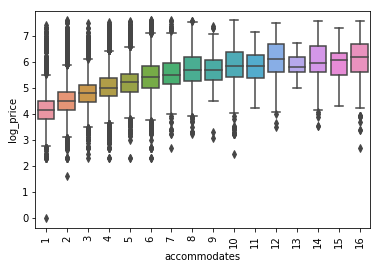

In [5]:
accommodates = sorted(train['accommodates'].value_counts().index.unique())
g = sns.boxplot(x="accommodates", y="log_price", orient='v', data=train)
g.set_xticklabels(accommodates, rotation=90)

### Location Information

The average pricing among cities seems similar, although a little lower for Boston, and a little higher for Chicago and SF.

[Text(0,0,'Boston'),
 Text(0,0,'Chicago'),
 Text(0,0,'DC'),
 Text(0,0,'LA'),
 Text(0,0,'NYC'),
 Text(0,0,'SF')]

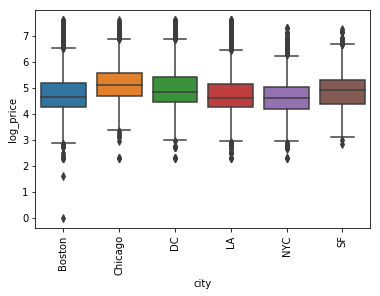

In [6]:
city = sorted(train['city'].value_counts().index.unique())
g = sns.boxplot(x="city", y="log_price", orient='v', data=train)
g.set_xticklabels(city, rotation=90)

However, if we look at segment data by state, the trends for different variables can differ depending on the state. 

##### Income

For example, there is a positive correlation between income level and pricing. However, the strength of this correlation varies by city. For example - NYC has a correlation of 0.38 between log_price and log_income, while SF has the lowest correlation of 0.12.

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


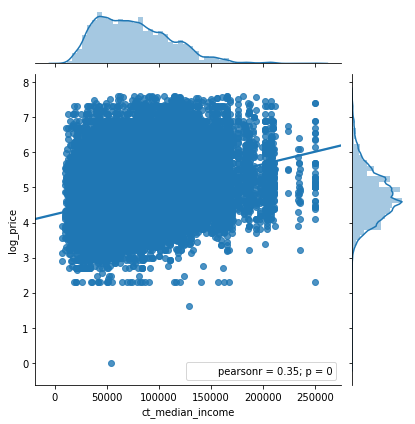

In [10]:
data['log_income'] = np.log(data['ct_median_income'])
sns.jointplot(x='ct_median_income', y='log_price', kind='reg', data=data[data['ct_median_income']!=0])

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


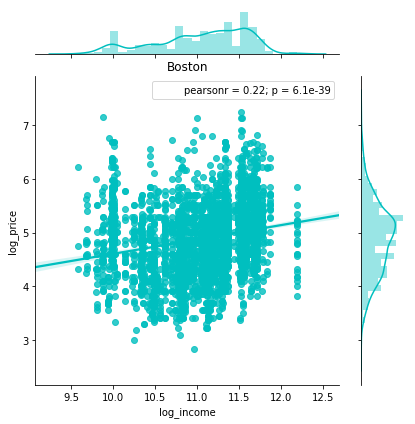

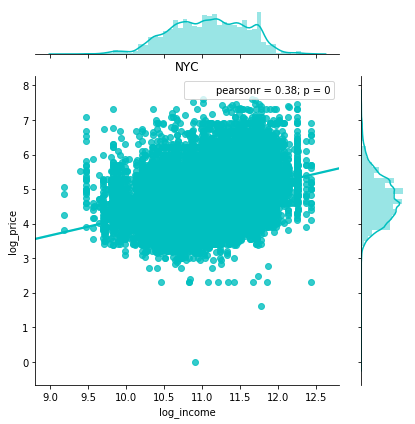

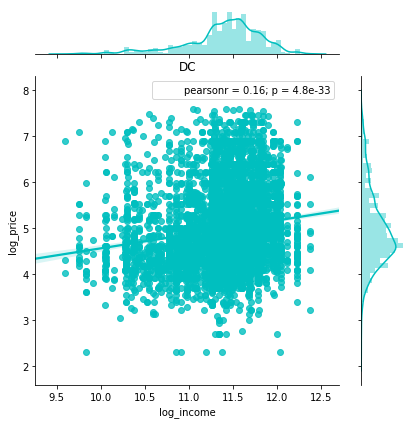

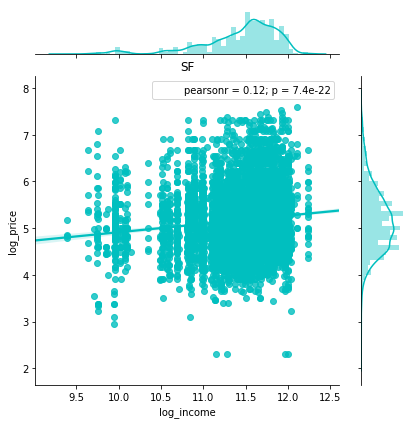

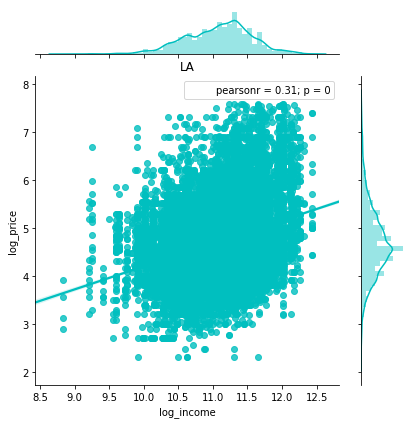

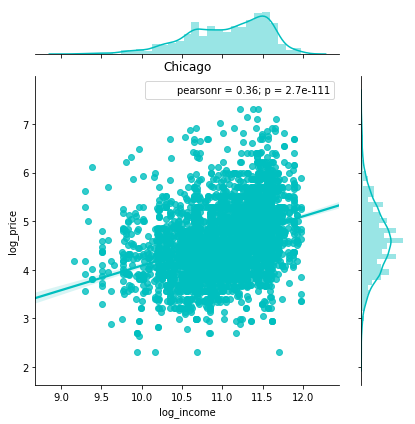

In [14]:
data = pd.read_csv('data_final2.csv', encoding = "ISO-8859-1")
data = data[data['dataset']=='train']
data['log_income'] = np.log(data['ct_median_income'])
cities = ['Boston', 'NYC', 'DC', 'SF', 'LA', "Chicago"]
for c in cities:
    d = data[(data['ct_median_income']!=0) & (data['city']==c)]
    g = sns.jointplot('log_income', 'log_price', data=d, kind='reg', color='c', space=0.5, ratio=5)
    plt.title(c)

Among neighborhoods belonging to the same city, the effect of income level can be different. For example, in the financial district of Boston, there is a negative correlation between income level and price. However, many neighborhoods contain too few data points to conduct data analysis at the neighborhood level.

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


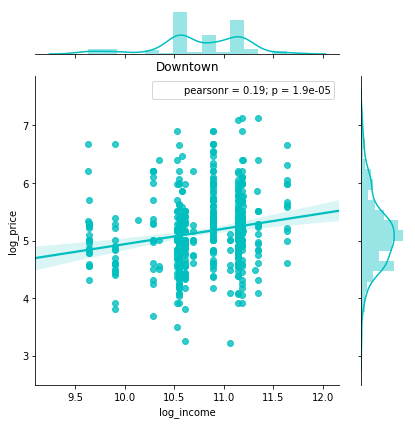

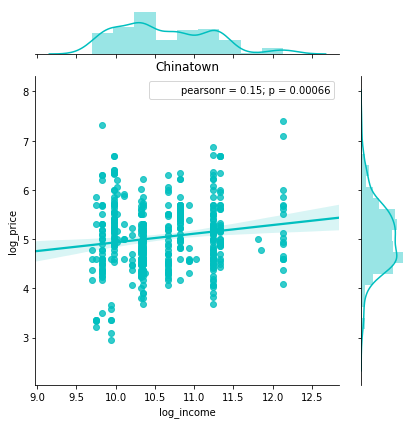

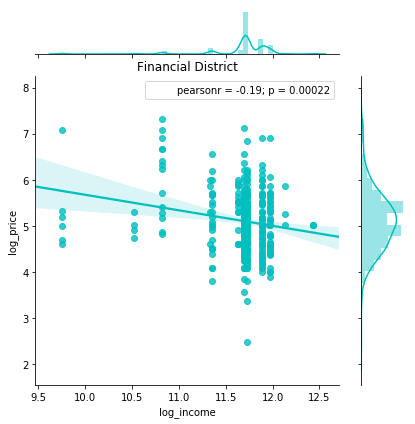

In [15]:
### Boston
t = pd.read_csv('data_final.csv', encoding = "ISO-8859-1")
t = t[t['dataset']=='train']
t['log_income'] = np.log(t['ct_median_income'])
most_expensive_towns = ['Downtown', 'Chinatown', 'Financial District']
for c in most_expensive_towns:
    d = t[(t['ct_median_income']!=0) & (t['neighbourhood_'+c]==1)]
    g = sns.jointplot('log_income', 'log_price', data=d, kind='reg', color='c', space=0.5, ratio=5)
    plt.title(c)

##### Distance From City Center

There is negative correlation between distance from city center for the room and log_price, but the size of correlation differs for each city. The negative correlation is greatest for Boston, at -0.4, while for Los Angeles, the correlation is weakest, at -0.056. So, for Boston, being 15 miles away from the city center (downtown Boston) decreases pricing by about 100 dollars, 
while in LA, being 80 miles away from city center (Hollywood) decreases pricing by only about 30 to 40 dollars. Perhaps this is due to the commercial/technology hub within Boston, making it much more valuable to be closer.

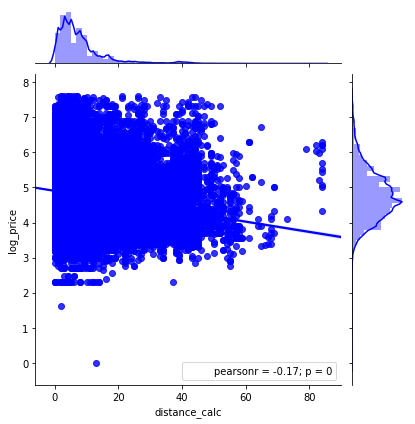

In [16]:
sns.jointplot(x='distance_calc', y='log_price', color='b', kind='reg', data=data)

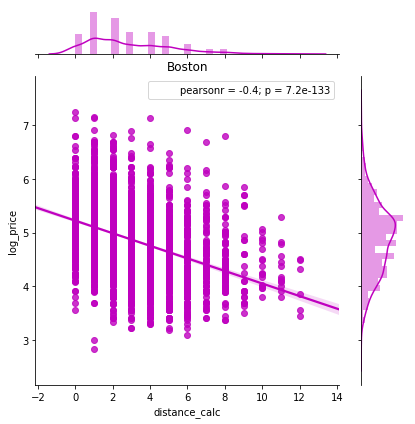

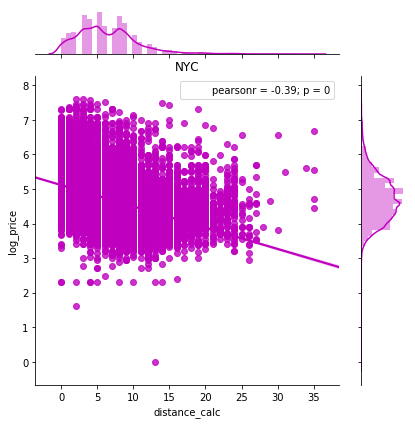

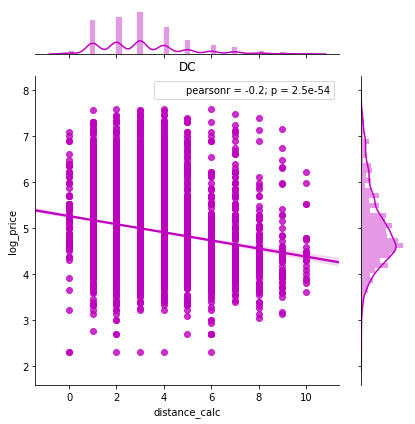

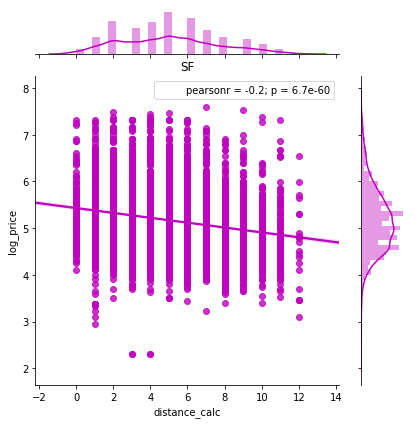

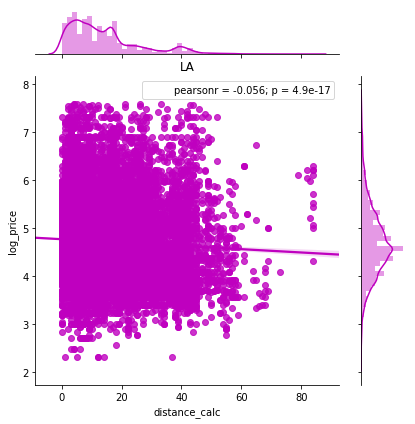

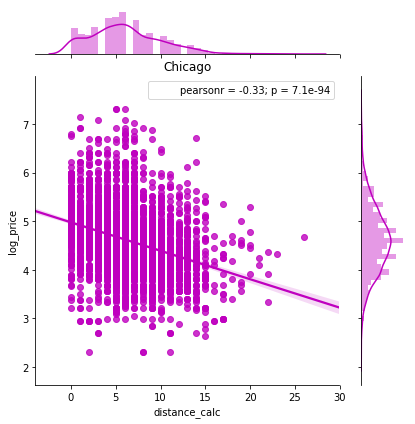

In [17]:
for c in cities:
    d = data[data['city']==c]
    g = sns.jointplot('distance_calc', 'log_price', data=d, kind='reg', color='m', space=0.5, ratio=5)
    plt.title(c)

#### Attractions, Restaurants, Shops, Etc., Close By

Using Google Places API: for each rental room, we pulled in data on the number of attractions, restaurants, shops, transit stations, etc., within a 5-km radius of the room.

We had the following observations on this data:

The below factors are correlated with a lower log_price of 4, compared to the average log_price that is closer to 5:
- Having a lot of ATM's & Banks 
- Having lots of bars
- Having a lot of cardealers/car repair shops/carwashes nearby - may indicate a slightly less well-off part of town
- Having more churches, city halls, courthouses, government offices
- Being close to clothing stores, department stores, grocery stores, convenience stores, doctors' offices, furniture stores, electronics stores nearby - these may suggest a less expensive part of the city
- Having firestations nearby
- Being close to schools - perhaps being closer to residential areas corresponds with a lower price
- Being close to several hospitals
- Being close to train stations - perhaps too noisy, or corresponds to being on the outskirts of the city to require a train and longer-distance travel

Factors that seem to correspond to higher prices than average (log_price closer to 6)
- Having 2 bus stations / transit stations (excluding train stations) - may correlate with being located closer to more central parts of city and more ease of transport
- Having an embassy close by
- Having a large number (at least 12) of places to get food (log_price is close to 7)
- Close to liquor stores
- Close to a large number of jewelry stores
- Close to several spas

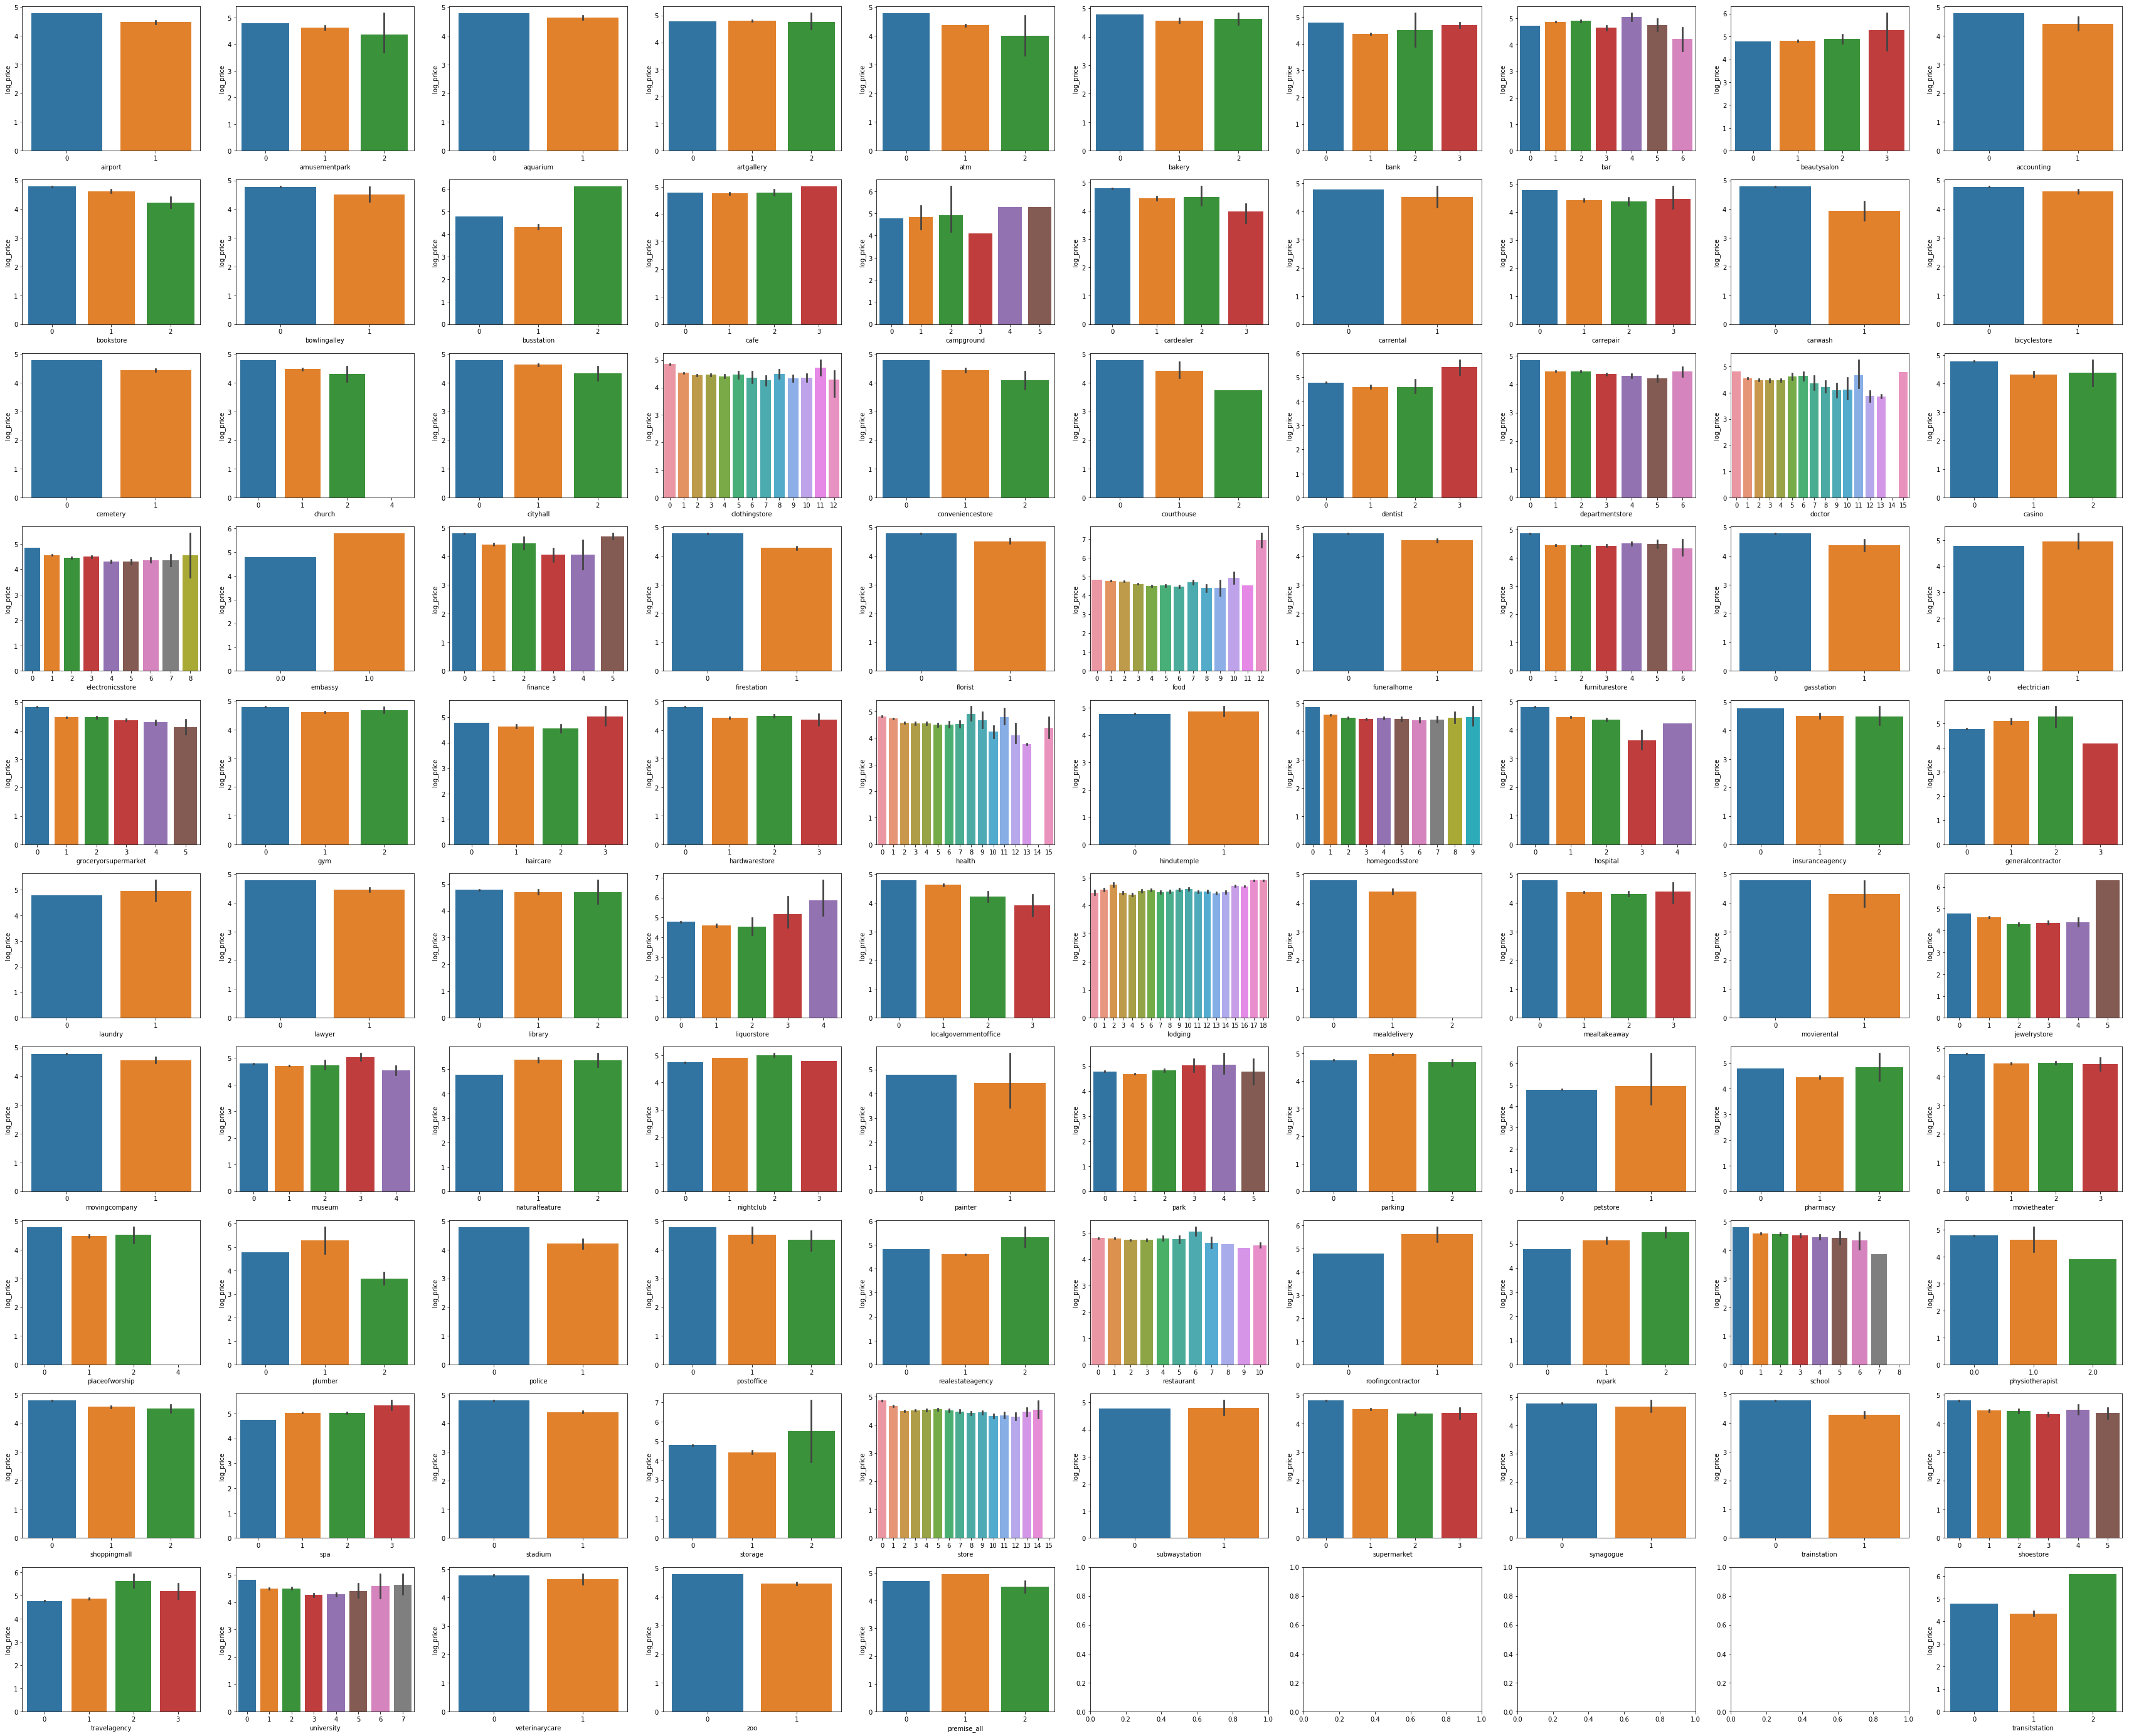

In [26]:
data = pd.read_csv('data_0309_v1.csv', encoding = "ISO-8859-1")
fig, axes = plt.subplots(nrows=10, ncols=10, sharey=False)
fig.set_size_inches(60, 50)
for i in range(len(nearby_places)):
    sns.barplot(x=data[nearby_places[i]], y=data['log_price'], ax=axes[int(i/10)][(i%10-1)])

### Amenities

When studying amenities: most amenities do not seem to have too significant of an impact on price, contrary to our expectation.

Amenities that seem to correspond with a higher price (log_price closer to 6) are:
- having bath towel
- having body soap/ hand soap
- hand/paper towels
- have toilet paper

Amenities that correspond with a lower price (log_price closer to 4):
- being handicap-accessible, such as having guardrails in the bathroom

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


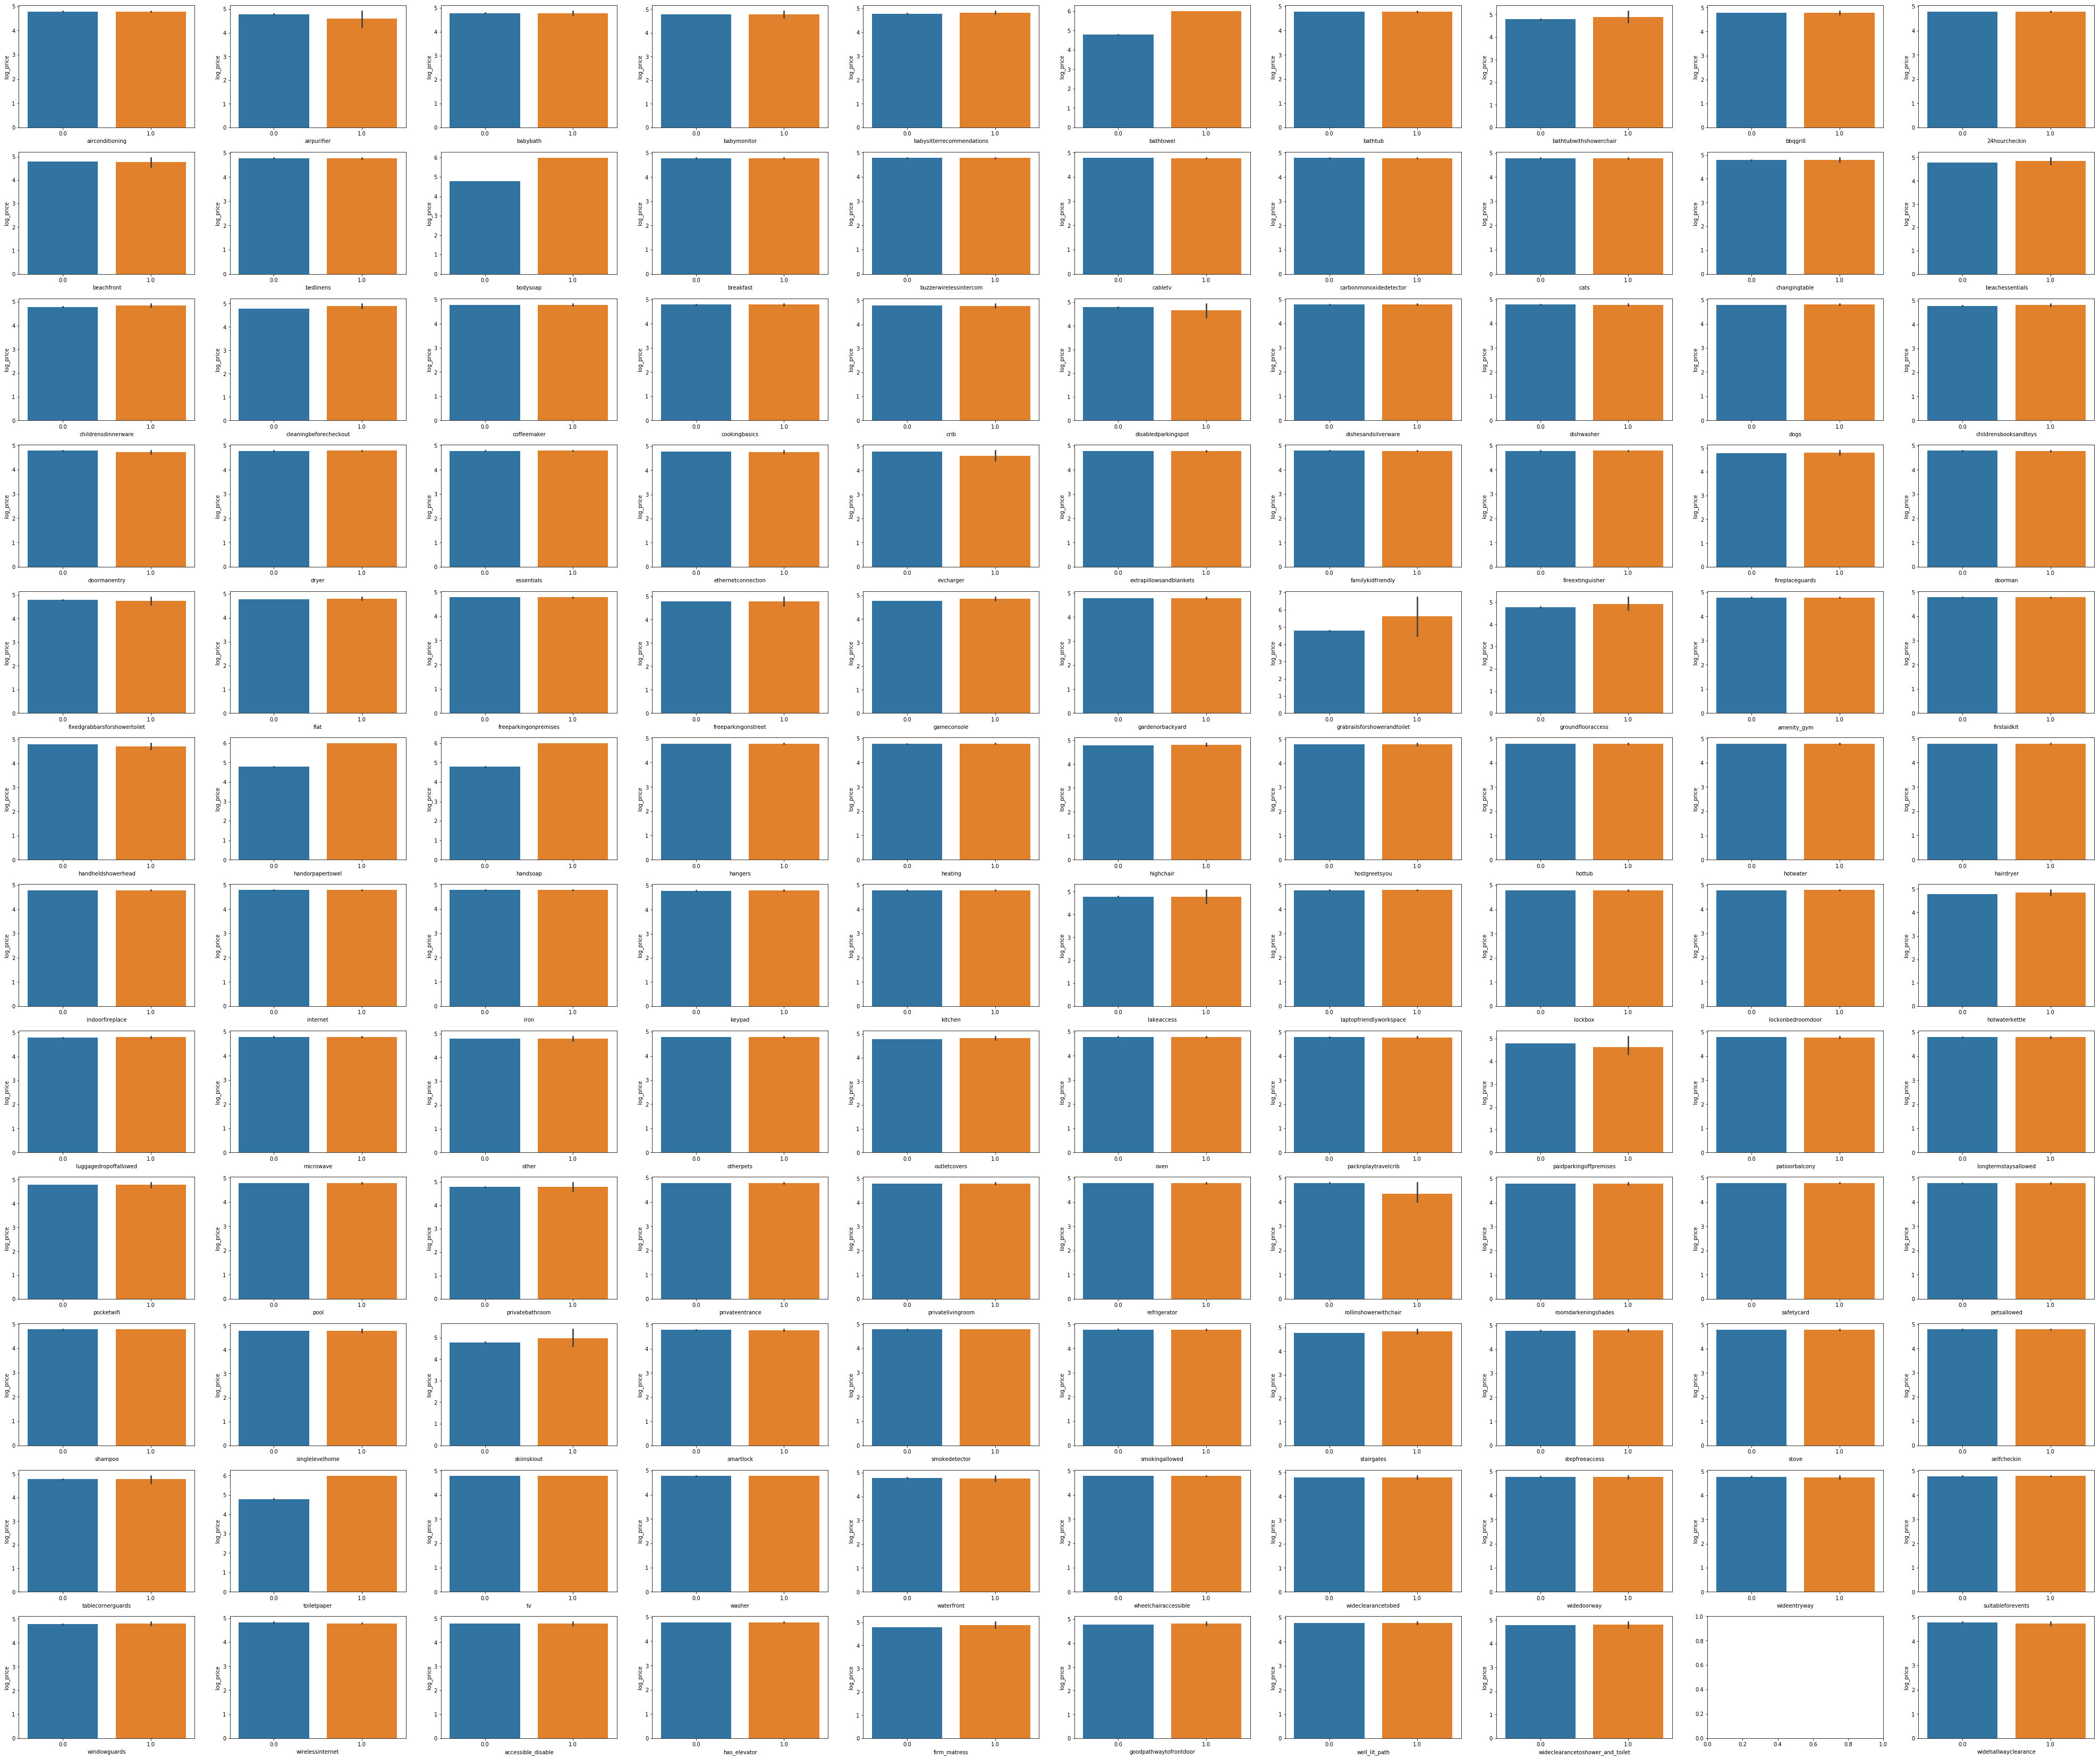

In [31]:
data = pd.read_csv('data_final2.csv', encoding = "ISO-8859-1")
fig, axes = plt.subplots(nrows=12, ncols=10, sharey=False)
fig.set_size_inches(70, 60)
for i in range(len(amenities)):
    sns.barplot(x=data[amenities[i]], y=data['log_price'], ax=axes[int(i/10)][(i%10-1)])

### Natural Language Processing

Words that correspond with a higher price (log_price closer to 6):
    - vacation: the more often this word appeared, the closer the log price is to 6 and 7
    - architecture
    - near_ocean (any terms related to ocean)
    - shopping: appearing 7 times pushed the log price from 5 to 6
    - cozy
    - luxury: appearing many times pushes the log_price to 6 and 7
    - vacation: appearing more than 5 times pushes the log_price closer to 6
    - upper
    - glass
    - club
    - soho
    - facing (this term may correspond to instances when the description is talking about a nice view that the 
        property faces)
    - air (perhaps this refers to when a room is airy, or close to more natural scenery)
    - explore
    - king
    - home
    - durable
    
Words that correspond with a lower price (log_price closer to 4):  
- diverse (is this because this term corresponds to areas with more immigrants?)
- bunk (more than 4 occurrences pushes log_price closer to 3)
- friendly (maybe there is a negative correlation b/c "friendly" often appears when discussing other people the person has to share the room with)
- share
- area
- suitable
- uptown 

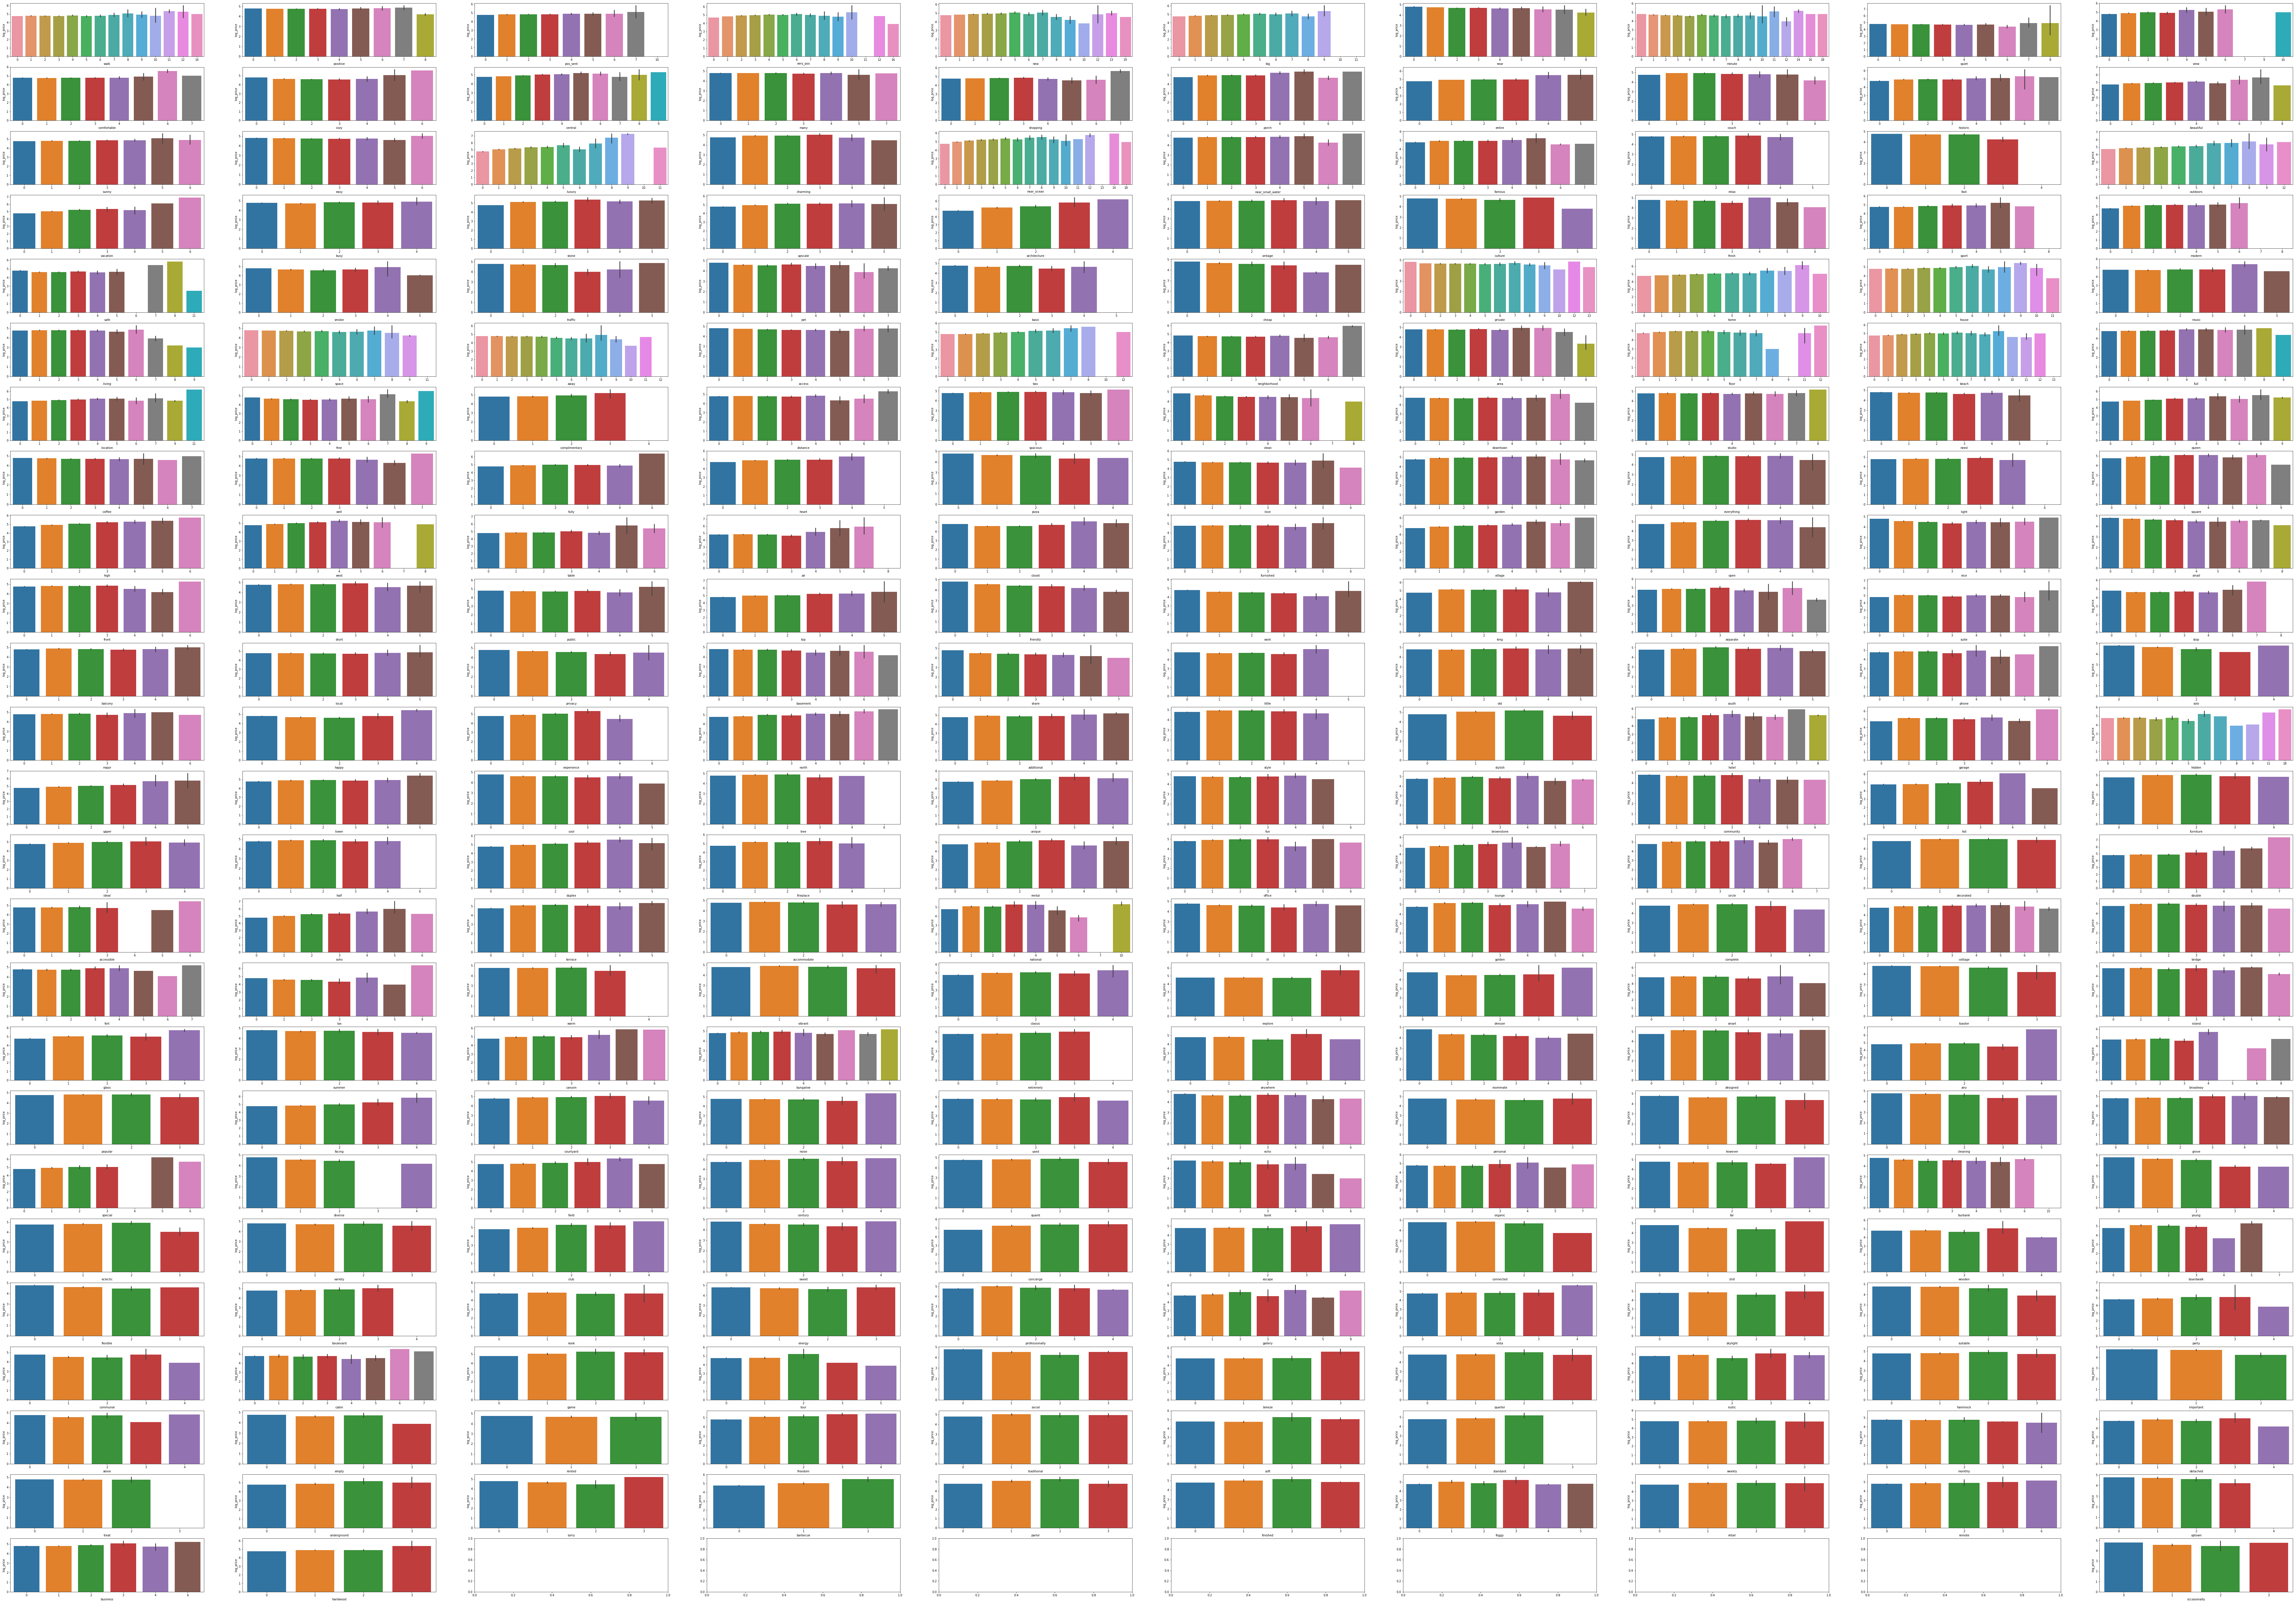

In [36]:
data = pd.read_csv('data_final3.csv', encoding = "ISO-8859-1")
fig, axes = plt.subplots(nrows=25, ncols=10, sharey=False)
fig.set_size_inches(140, 100)
for i in range(len(words)):
    sns.barplot(x=data[words[i]], y=data['log_price'], ax=axes[int(i/10)][(i%10-1)])

### Additional Factors

Other factors seemed to have stastically significant effects on price, but the size of the effect seemed small

##### Length of Time Person has been a Host

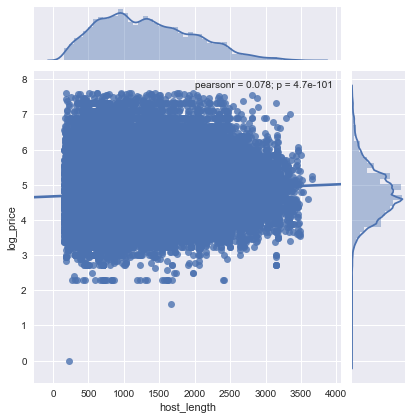

In [37]:
# host length is calculated by subtracting 'host_since' from the current date at the time of running the code
sns.set(font_scale=1)
#fig, ax = plt.subplots(figsize=(100, 30))
sns.jointplot(x='host_length', y='log_price', kind='reg', data=data)

##### Number of days since the last review

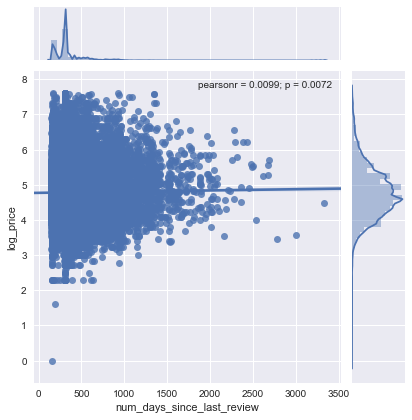

In [38]:
# Number of days since the last review
sns.jointplot(x='num_days_since_last_review', y='log_price', kind='reg', data=data)

##### Host Response Rate

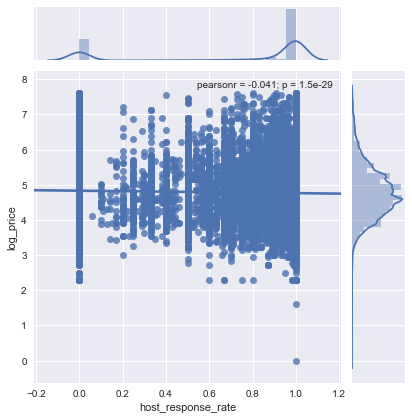

In [39]:
sns.jointplot(x='host_response_rate', y='log_price', kind='reg', data=data)

##### Number of Reviews

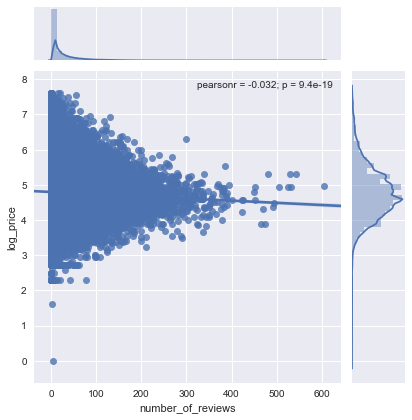

In [40]:
# Interestingly, the greater the number of reviews, the lower the log_price, though the size of the effect is small
sns.jointplot(x='number_of_reviews', y='log_price', kind='reg', data=data)

##### Cancellation Policy

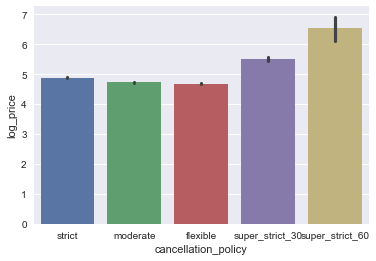

In [44]:
# It looks that stricter cancellation policies are correlated with a higher price
data = pd.read_csv('train.csv')
sns.barplot(x="cancellation_policy", y="log_price", orient='v', data=data)

##### Cleaning Fee

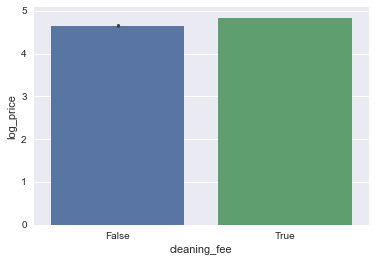

In [45]:
# Interestingly, whether there is a cleaning fee or not does not seem to make too much of a difference to price
sns.barplot(x="cleaning_fee", y="log_price", orient='v', data=data)

##### Host has profile pic

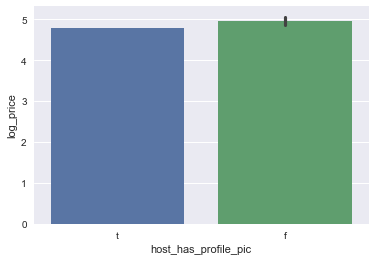

In [46]:
### Small positive effect, but not much difference
sns.barplot(x="host_has_profile_pic", y="log_price", orient='v', data=data)

##### Host Identify Verified

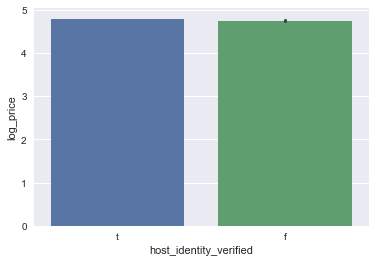

In [48]:
#### Does not seem to have much of a difference
sns.barplot(x="host_identity_verified", y="log_price", orient='v', data=data)

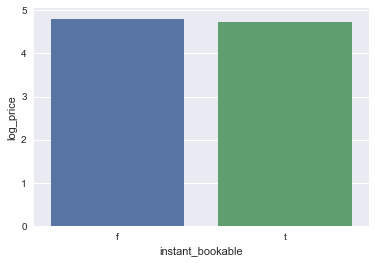

In [49]:
sns.barplot(x="instant_bookable", y="log_price", orient='v', data=data)

##### Color of room picture

In [2]:
data = pd.read_csv('data_0309_v1.csv', encoding = "ISO-8859-1")

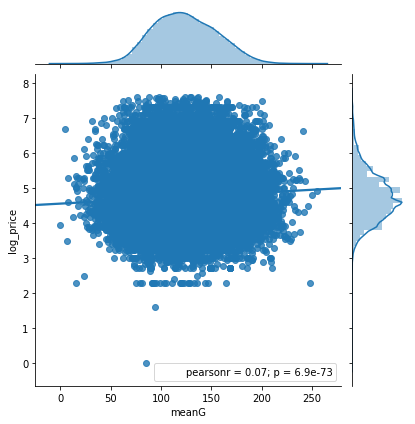

In [4]:
sns.jointplot(x='meanG', y='log_price', kind='reg', data=data)

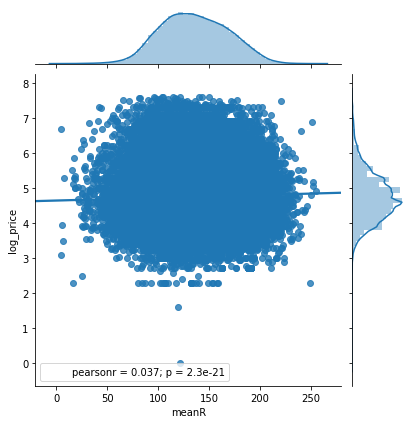

In [5]:
sns.jointplot(x='meanR', y='log_price', kind='reg', data=data)

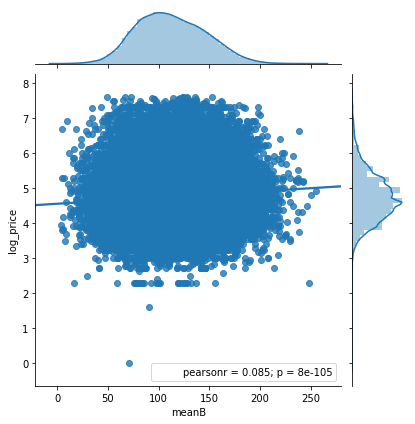

In [6]:
sns.jointplot(x='meanB', y='log_price', kind='reg', data=data)